# Data Exploration:-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Supply_Chain_Dataset_New.csv', encoding='latin1', engine='python')


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Supply_Chain_Dataset_New.csv', encoding='latin1', engine='python')


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,PAYMENT,5,4,-44.630001,284.250000,Late delivery,1,69,Acne Treatments,Caguas,...,Busan,PENDING_PAYMENT,NaN,1356,69,Neutrogena Stubborn Acne Blemish Patches,293.040008,0,11/24/2017 22:10,Standard Class
1,PAYMENT,2,4,87.180000,249.080002,Advance shipping,0,69,Acne Treatments,Caguas,...,Delhi,PENDING_PAYMENT,NaN,1356,69,Neutrogena Stubborn Acne Blemish Patches,293.040008,0,11/22/2017 7:38,Standard Class
2,DEBIT,3,2,105.489998,293.040008,Late delivery,1,69,Acne Treatments,Caguas,...,Hubei,COMPLETE,NaN,1356,69,Neutrogena Stubborn Acne Blemish Patches,293.040008,0,1/6/2018 13:31,Second Class
3,DEBIT,2,2,25.270000,287.179993,Shipping on time,0,69,Acne Treatments,Caguas,...,Tokio,COMPLETE,NaN,1356,69,Neutrogena Stubborn Acne Blemish Patches,293.040008,0,11/21/2017 3:36,Second Class
4,DEBIT,4,2,21.400000,243.220001,Late delivery,1,69,Acne Treatments,Caguas,...,Bangkok,COMPLETE,NaN,1356,69,Neutrogena Stubborn Acne Blemish Patches,293.040008,0,11/23/2017 18:19,Second Class


In [ ]:
#Data Description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

# Data preproccessing:-

Handle Missing values:

In [ ]:
#checking for missing values
df = data.copy(deep=False)

percent_Miss = (df.isnull().sum() / len(df)) * 100
values_missing = df.isnull().sum()
missingValuesDf = pd.DataFrame({'missing values': values_missing,'percentMissing': percent_Miss})
missingValuesDf

,missing values,percentMissing
Type,0,0.000000
Days for shipping (real),0,0.000000
Days for shipment (scheduled),0,0.000000
Benefit per order,0,0.000000
Sales per customer,0,0.000000
Delivery Status,0,0.000000
Late_delivery_risk,0,0.000000
Category Id,0,0.000000
Category Name,0,0.000000
Customer City,0,0.000000


In [ ]:
#filling
data.interpolate(inplace=True)

Remove unused column from the data:

In [ ]:
data = data.drop(['Order Zipcode','Customer Zipcode'], axis=1)
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,PAYMENT,5,4,-44.630001,284.250000,Late delivery,1,69,Acne Treatments,Caguas,...,Eastern Asia,Busan,PENDING_PAYMENT,1356,69,Neutrogena Stubborn Acne Blemish Patches,293.040008,0,11/24/2017 22:10,Standard Class
1,PAYMENT,2,4,87.180000,249.080002,Advance shipping,0,69,Acne Treatments,Caguas,...,South Asia,Delhi,PENDING_PAYMENT,1356,69,Neutrogena Stubborn Acne Blemish Patches,293.040008,0,11/22/2017 7:38,Standard Class
2,DEBIT,3,2,105.489998,293.040008,Late delivery,1,69,Acne Treatments,Caguas,...,Eastern Asia,Hubei,COMPLETE,1356,69,Neutrogena Stubborn Acne Blemish Patches,293.040008,0,1/6/2018 13:31,Second Class
3,DEBIT,2,2,25.270000,287.179993,Shipping on time,0,69,Acne Treatments,Caguas,...,Eastern Asia,Tokio,COMPLETE,1356,69,Neutrogena Stubborn Acne Blemish Patches,293.040008,0,11/21/2017 3:36,Second Class
4,DEBIT,4,2,21.400000,243.220001,Late delivery,1,69,Acne Treatments,Caguas,...,Southeast Asia,Bangkok,COMPLETE,1356,69,Neutrogena Stubborn Acne Blemish Patches,293.040008,0,11/23/2017 18:19,Second Class


In [ ]:
data.shape

(180519, 46)

In [ ]:
#get static summary
data.describe()


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Latitude,Longitude,Order Customer Id,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,29.719955,-84.915675,6691.379495,...,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,692.509764,31.851451,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,9.813646,21.433241,4162.918106,...,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,336.446807,15.640064,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,-33.937553,-158.025986,1.000000,...,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,18.265432,-98.446312,3258.500000,...,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,33.144863,-76.847908,6457.000000,...,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,39.279617,-66.370583,9779.000000,...,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,48.781933,115.263077,20757.000000,...,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990,0.0


# Data visualization:-


In [ ]:
# change object data into int or float

hist_data = data.copy(deep=False)
# drop unused data
hist_data = hist_data.drop(['Category Id','Customer Id','order date (DateOrders)','Product Category Id',
                            'Order Country','Order City',], axis=1)
from sklearn.preprocessing import LabelEncoder
def Change_obj_type(data):
    for column in data.columns:
        if data[column].dtype == type(object):
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
    return data
customer_data = Change_obj_type(hist_data)
customer_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,2,5,4,-44.630001,284.250000,1,1,0,66,1,...,-44.630001,7,174,6,1356,79,293.040008,0,15445,3
1,2,2,4,87.180000,249.080002,0,0,0,66,1,...,87.180000,13,283,6,1356,79,293.040008,0,15114,3
2,1,3,2,105.489998,293.040008,1,1,0,66,1,...,105.489998,7,440,2,1356,79,293.040008,0,6258,2
3,1,2,2,25.270000,287.179993,3,0,0,66,1,...,25.270000,7,1002,2,1356,79,293.040008,0,14913,2
4,1,4,2,21.400000,243.220001,1,1,0,66,1,...,21.400000,15,114,2,1356,79,293.040008,0,15257,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,1,2,1,79.480003,218.949997,1,1,48,66,1,...,79.480003,15,478,3,1358,107,260.649994,0,16721,0
180515,1,2,1,16.030001,213.729996,1,1,48,66,1,...,16.030001,7,354,3,1358,107,260.649994,0,16671,0
180516,2,5,2,-28.860001,255.440002,1,1,48,66,1,...,-28.860001,15,932,4,1358,107,260.649994,0,16673,2
180517,2,5,2,-31.650000,229.369995,1,1,48,66,1,...,-31.650000,11,90,6,1358,107,260.649994,0,21809,2


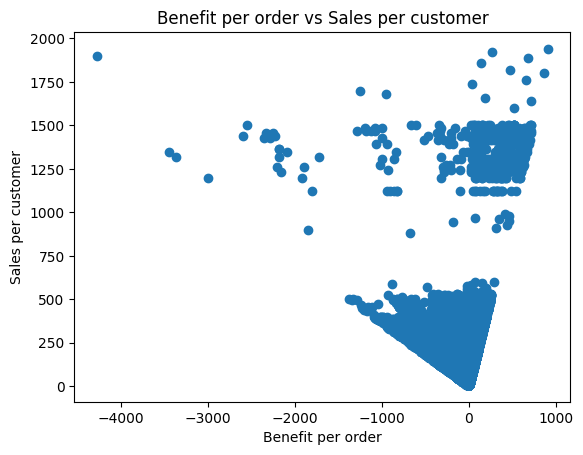

In [ ]:
#Benefit per order vs Sales per customer
plt.scatter(df['Benefit per order'], df['Sales per customer'])
plt.title('Benefit per order vs Sales per customer')
plt.xlabel('Benefit per order')
plt.ylabel('Sales per customer')
plt.show()

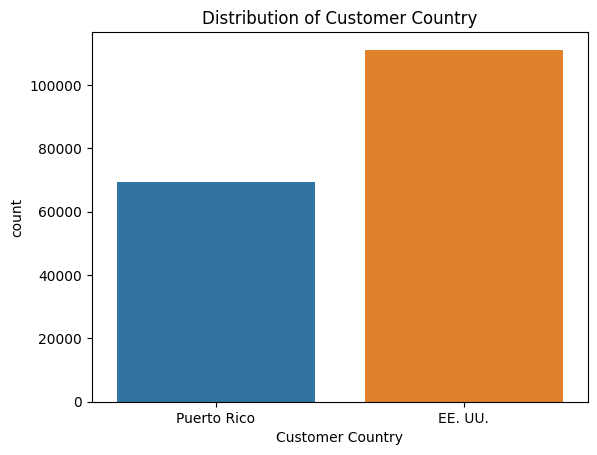

In [ ]:
# Customer Country
sns.countplot(x='Customer Country', data=data);
plt.title('Distribution of Customer Country');

Text(0.5, 1.0, 'Top 10 Customer city')

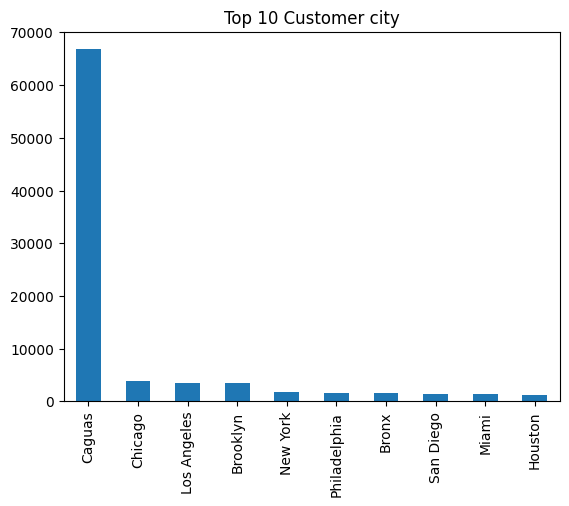

In [ ]:
# Top ten Customer City
data['Customer City'].value_counts()[:10].plot(kind='bar')
plt.title("Top 10 Customer city")

Text(0.5, 1.0, 'Distribution of Payment types')

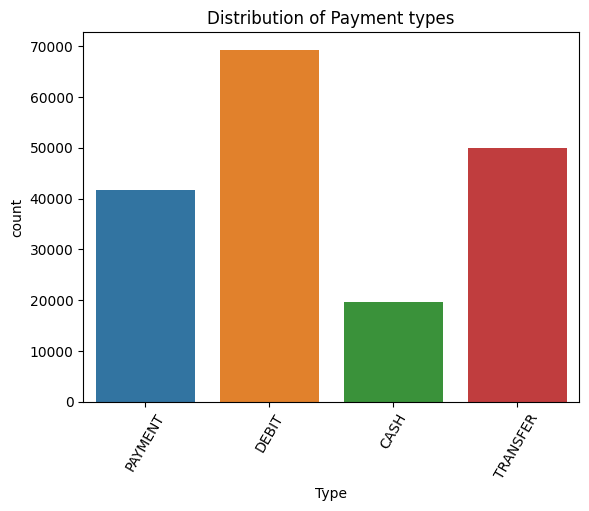

In [ ]:
# Payment type
plot = sns.countplot(x='Type', data=data);
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
plt.title("Distribution of Payment types")

Text(0.5, 1.0, 'Top 15 Category of goods')

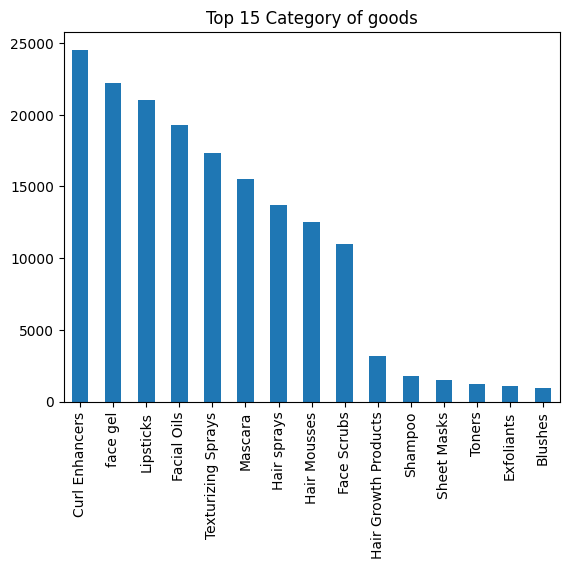

In [ ]:
# Top 15 Category of goods
data['Category Name'].value_counts()[:15].plot(kind='bar')
plt.title("Top 15 Category of goods")

Text(0.5, 1.0, 'Market list')

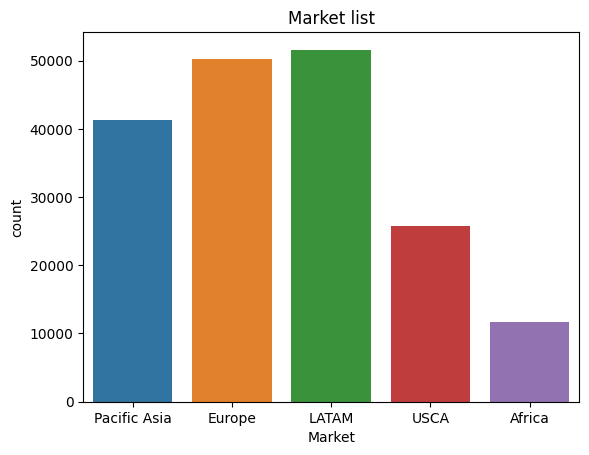

In [ ]:
# Market
sns.countplot(x='Market', data=data);

#data['Market'].value_counts().plot(kind='bar')
plt.title("Market list")

Text(0.5, 1.0, 'Order Regions')

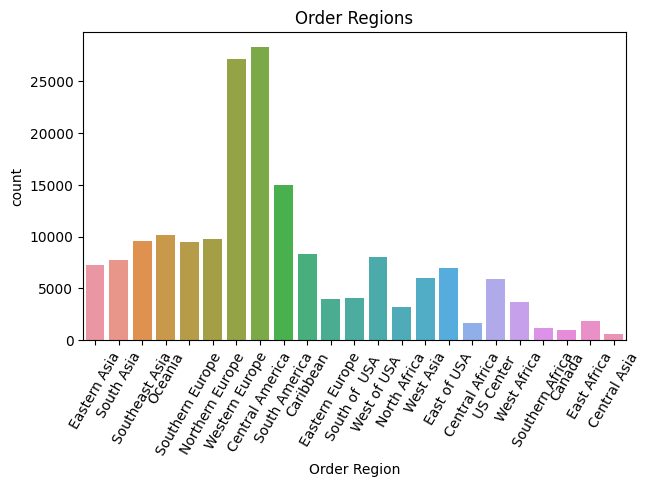

In [ ]:
# Order Region
plt.figure(figsize=(7,4))
plot = sns.countplot(x='Order Region', data=data);
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
#data['Order Region'].value_counts().plot(kind='bar')
plt.title("Order Regions")

Text(0.5, 1.0, 'Top 20 Product Name')

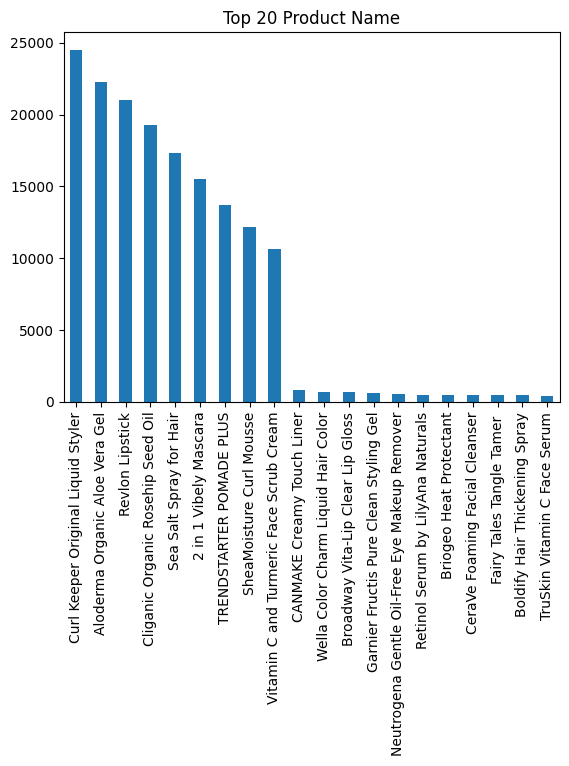

In [ ]:
# Top 20 Product Name
data['Product Name'].value_counts()[:20].plot(kind='bar')
plt.title('Top 20 Product Name')

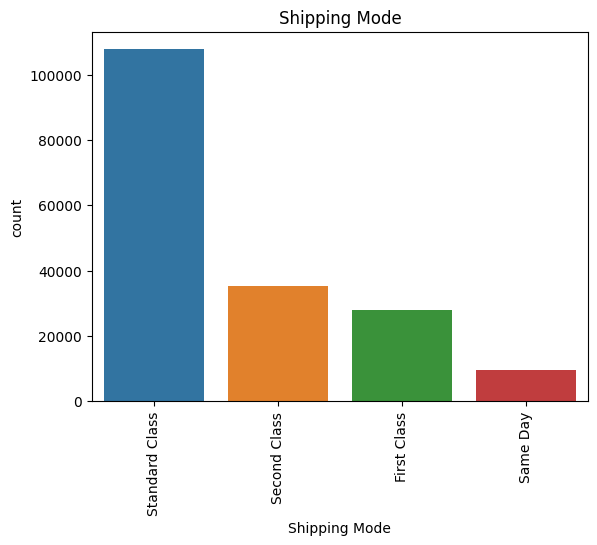

In [ ]:
# Shipping Mode
sns.countplot(x='Shipping Mode', data=data)
plt.title('Shipping Mode')
plt.xticks(rotation = 90)
plt.show()

# Correlation analysis

In [ ]:
corr_data = data.copy(deep=False)
# drop unused data
corr_data = corr_data.drop(['Category Id','Customer Id','order date (DateOrders)','Product Category Id'], axis=1)

# change object type data into int
from sklearn.preprocessing import LabelEncoder
def Change_obj_type(data):
    for column in data.columns:
        if data[column].dtype == type(object):
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
    return data
cor_data = Change_obj_type(corr_data)

Text(0.5, 168.5815972222222, 'xlabel')

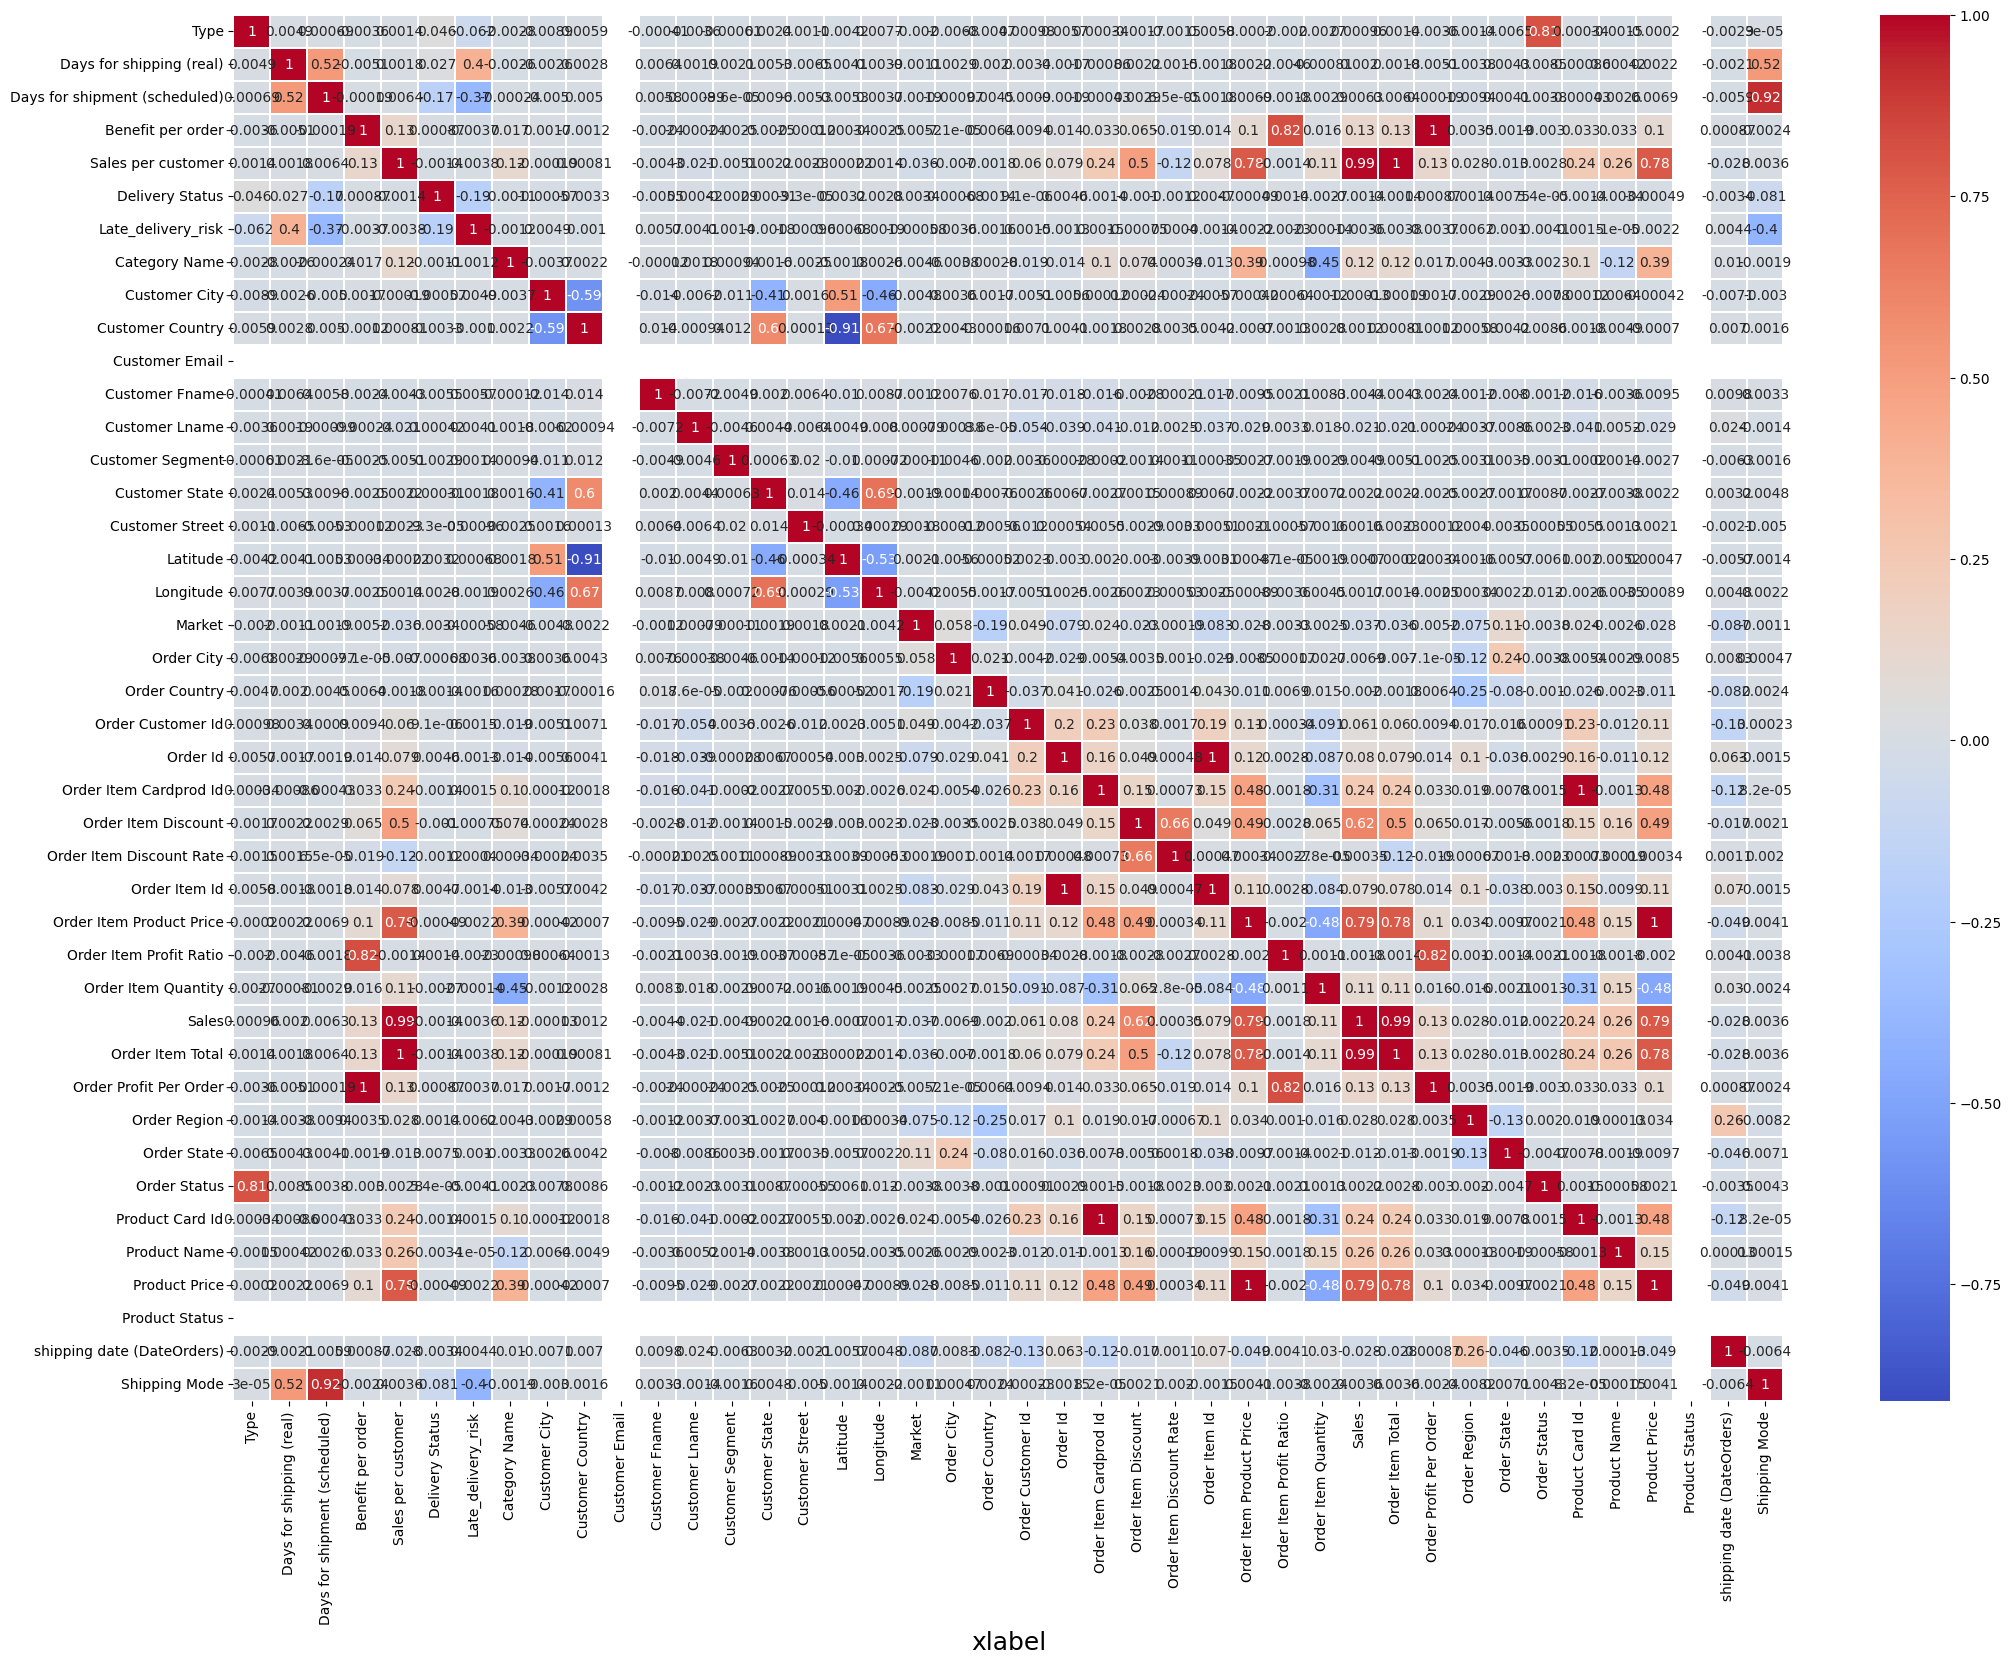

In [ ]:
from scipy.stats import norm
corr_m = cor_data.corr()
f, ax = plt.subplots(figsize=(25,18))
plot = sns.heatmap(corr_m, ax = ax,annot = True, cmap ="coolwarm", linewidths = 0.1)
plt.xlabel('xlabel', fontsize=18)

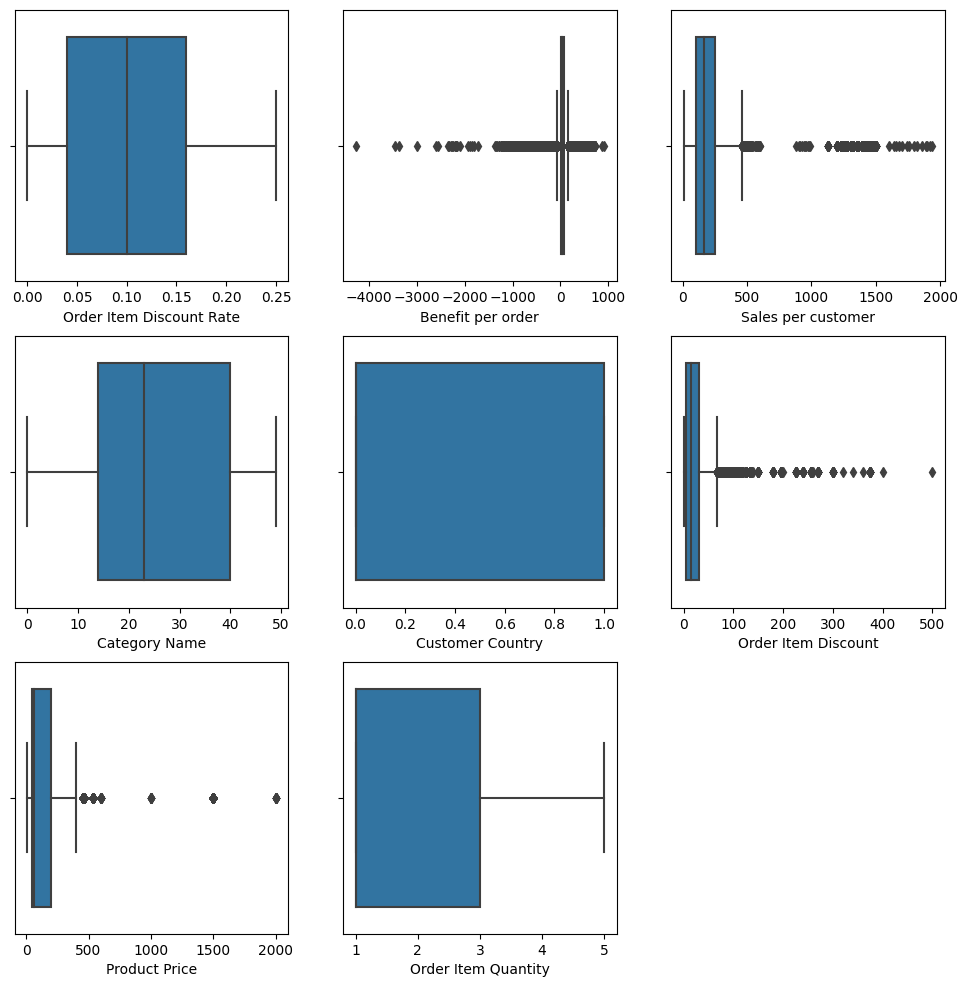

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Order Item Discount Rate', data=cor_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'Benefit per order', data=cor_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'Sales per customer', data=cor_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'Category Name', data=cor_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'Customer Country', data=cor_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'Order Item Discount', data=cor_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'Product Price', data=cor_data)
plt.subplot(3,3,8)
sns.boxplot(x = 'Order Item Quantity', data=cor_data)
plt.show()

pair plots :

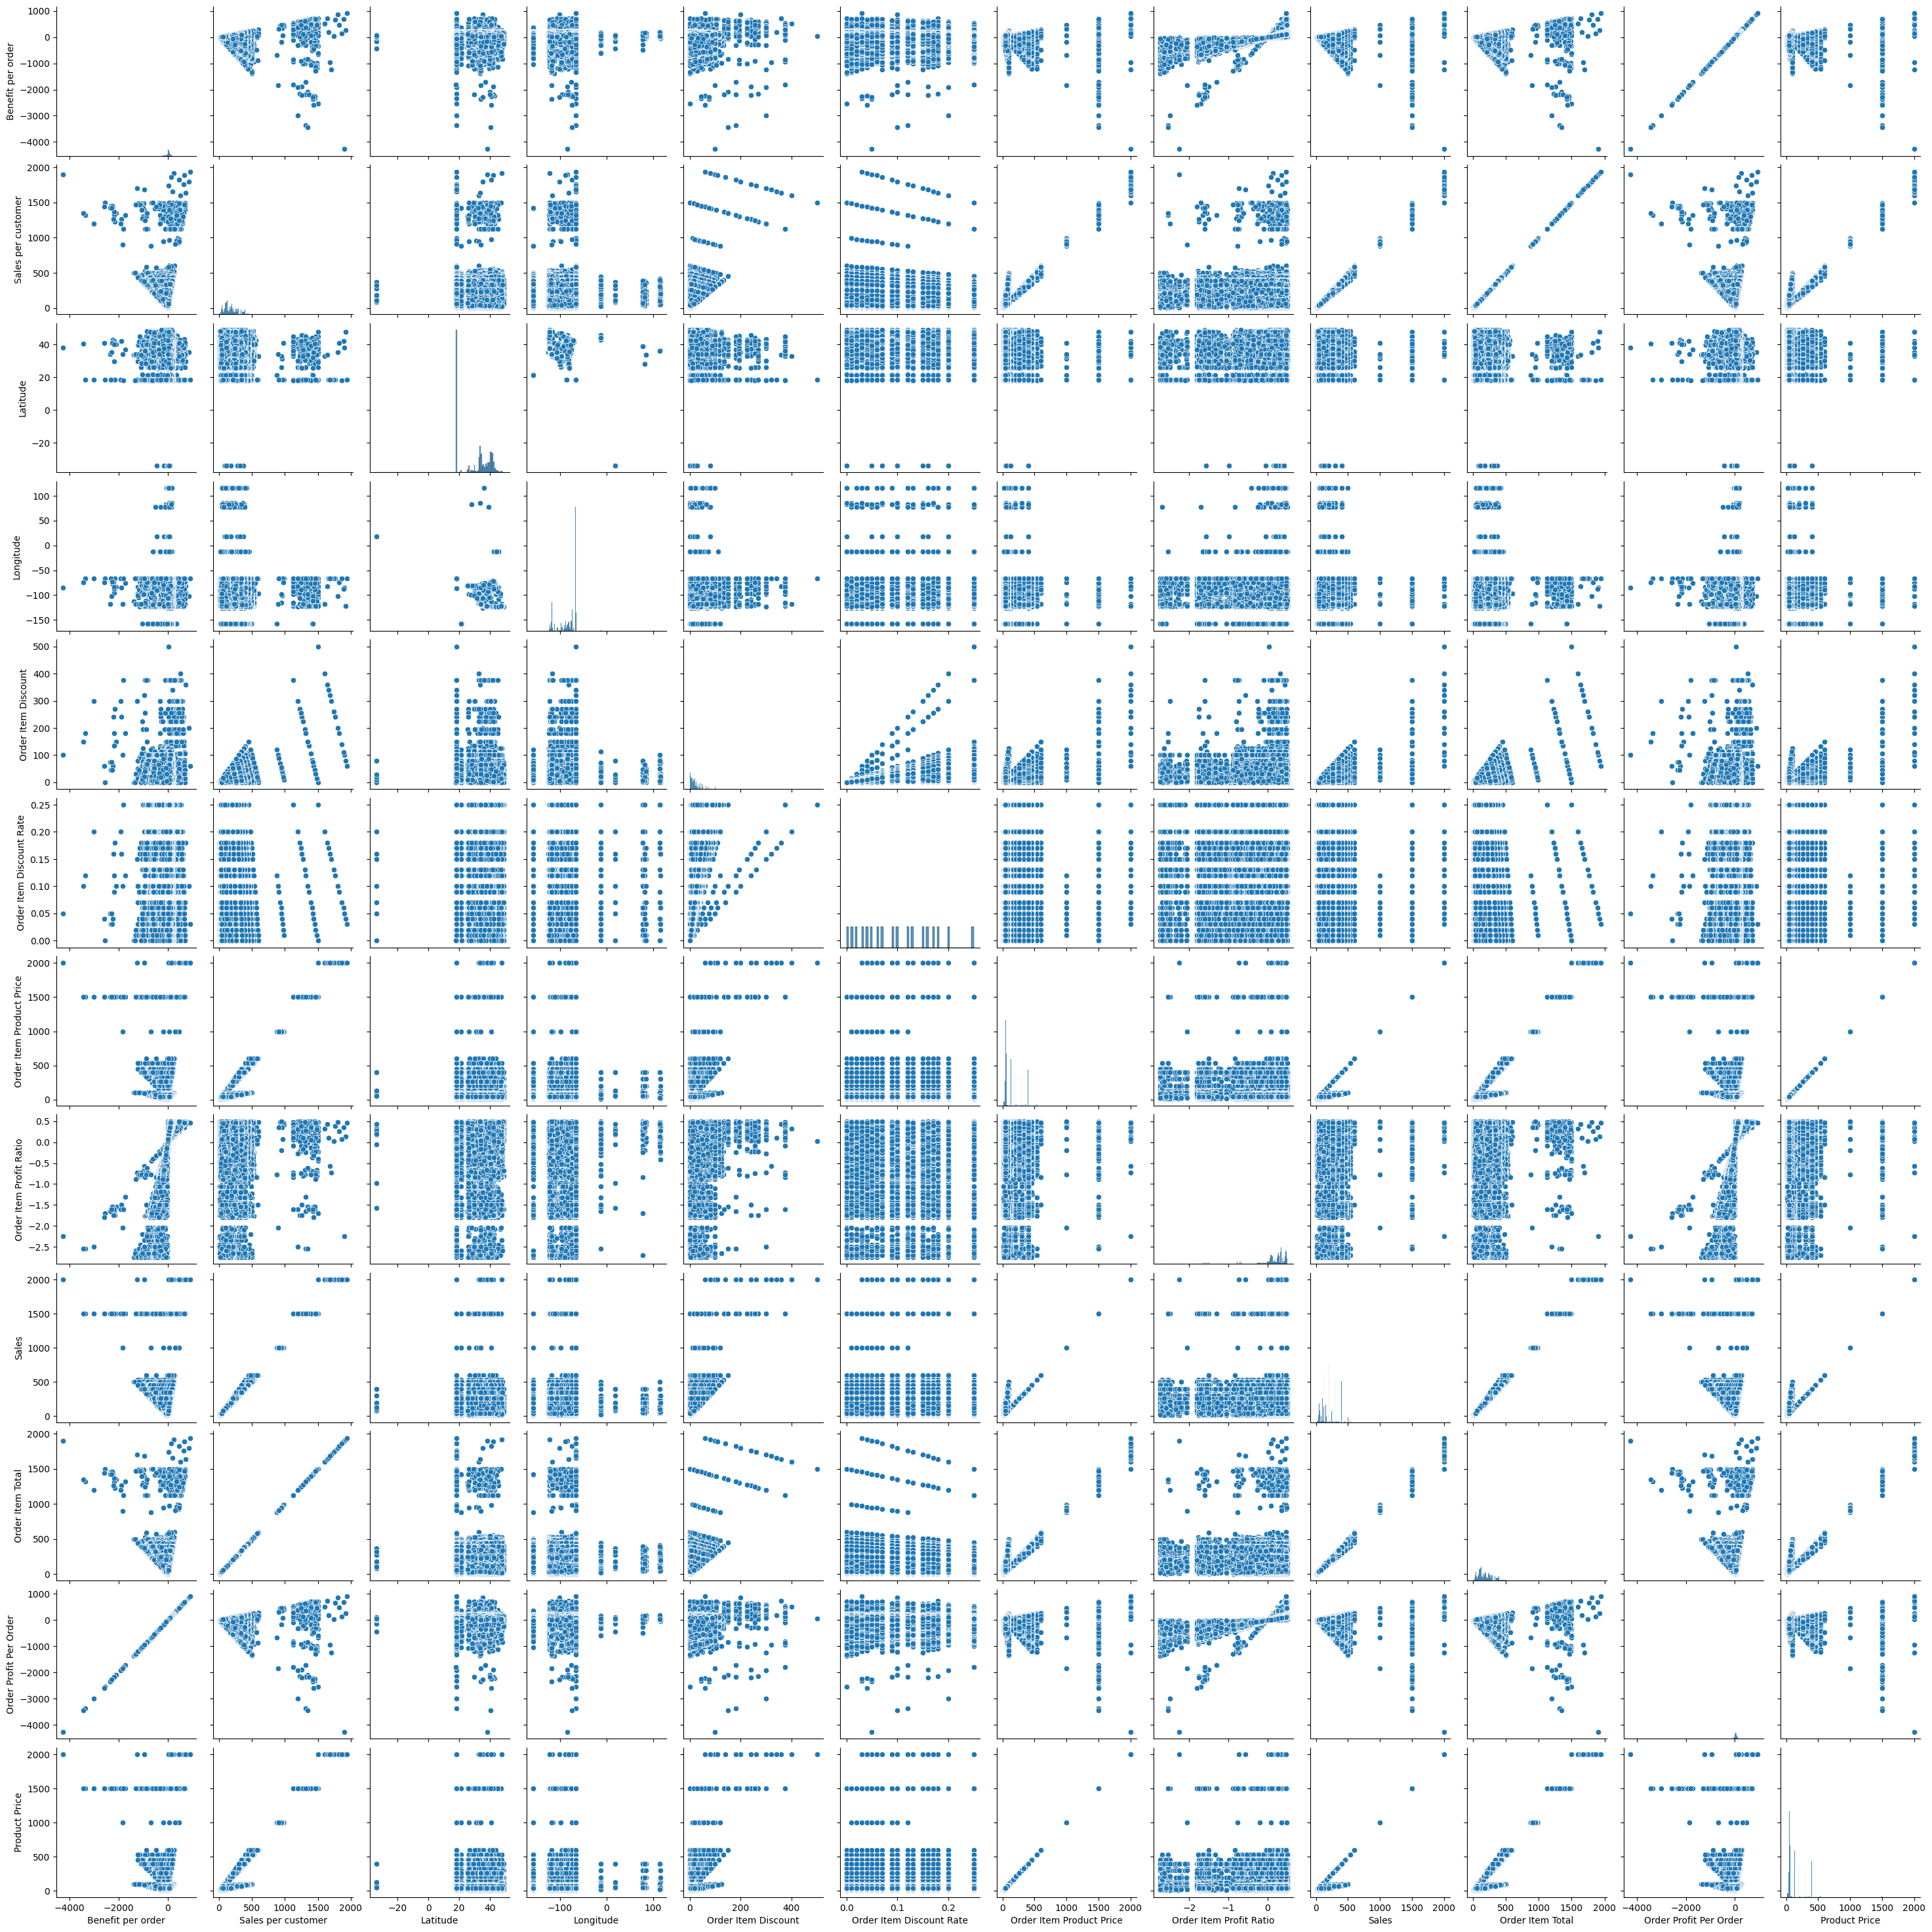

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# For demonstration purposes, let's assume 'data' is already loaded with your dataset

# Select only continuous columns
continuous_columns = data.select_dtypes(include=['float64'])

# Plot pairplot
sns.pairplot(continuous_columns)
plt.show()
